In [1]:
%load_ext autoreload
%autoreload 1

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.append('../src')
from data import fetch_model_data
%aimport data.fetch_model_data

In [50]:
ip_address = '3.134.76.143'
raw = fetch_model_data.fetch_model_data(ip_address)

In [51]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 24 columns):
bill_id                          1748 non-null int64
author_ideology                  1748 non-null float64
author_party                     1748 non-null int64
author_is_chair                  1748 non-null int64
author_years_sen                 1748 non-null float64
author_total_funding             1748 non-null float64
total_sponsors                   1748 non-null int64
dem_sponsors                     1748 non-null int64
rep_sponsors                     1748 non-null int64
most_liberal_sponsor_ideology    1748 non-null float64
most_cons_sponsor_ideology       1748 non-null float64
sponsor_chairs                   1748 non-null int64
description                      1748 non-null object
third_reading                    1748 non-null int64
agg_funding_sponsors             1748 non-null float64
agg_exp_sponsors                 1748 non-null float64
total_slips                   

In [8]:
fetch_model_data.add_trivial_features(raw)

# Handle Nulls

## Ideology Range

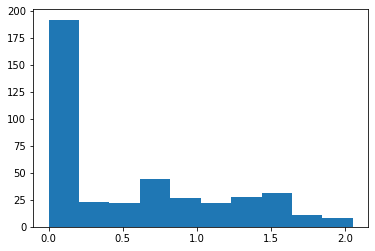

In [20]:
# seems like 0 is defensible imputation value
    # Better would be to impute in sql before doing the calculations
    # fill in data for missing senators in table people_detail
        # fill in null party values
        # fill in null ideol as mean of party
plt.hist(raw.ideol_range);

# Slips Percent Pro

In [25]:
# only nan values are from zero total slips
    # if no slips, then 0 percent were pro is defensible
raw[raw.total_slips != 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 1747
Data columns (total 24 columns):
bill_id                          832 non-null int64
author_ideology                  706 non-null float64
author_party                     777 non-null float64
author_is_chair                  832 non-null int64
author_years_sen                 775 non-null float64
author_total_funding             732 non-null float64
total_sponsors                   832 non-null int64
dem_sponsors                     832 non-null int64
rep_sponsors                     832 non-null int64
most_liberal_sponsor_ideology    392 non-null float64
most_cons_sponsor_ideology       392 non-null float64
sponsor_chairs                   832 non-null int64
description                      832 non-null object
third_reading                    832 non-null int64
agg_funding_sponsors             396 non-null float64
agg_exp_sponsors                 404 non-null float64
total_slips                      832 non-null

In [52]:
# nulls are really because of gaps in ideology, funding, exp of senators
# fill those in db with:
    # ideology -> mean of party affiliation
    # funding -> median
    # exp -> median
# Once that's done, the only nulls will be b/c of the lack of slips or cosponsors
    # easily filled with 0's